<a href="https://colab.research.google.com/github/raffeekk/ML25/blob/main/homework/HW4_GorbunenkoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение
## Практическое задание 4.


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

В финальной версии ноутбука, которая отправляется для сдачи задания, должны быть быть выполнены следующие условия:
* все ячейки выполнены для представленной в ноутбуке версии кода
* результаты выполнения ячеек отображены и согласованы с кодом
* при повторном запуске ячеек результаты должны воспроизводиться с точностью до случайности

Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: HW4_Username.ipynb, где Username — Ваша фамилия и инициалы на латинице (например, HW4_IvanovII.ipynb).

## Кластеризация

![Digits](https://www.dropbox.com/s/nrjiahdbpswd63y/digits.png?dl=1)

Задача [кластеризации](https://en.wikipedia.org/wiki/Cluster_analysis) данных является одним из примеров задач обучения "без учителя". Она заключается в разбиении множества объектов на заданное число кластеров, при этом предполагается, что внутри одного кластера будут находиться похожие между собой объекты. Одним из примеров методов кластеризации является алгоритм [KMeans](https://en.wikipedia.org/wiki/K-means_clustering).

### Выбор числа кластеров

Для некоторых алгоритмов кластеризации число кластеров является гиперпараметром (например, в случае KMeans). Поэтому для выбора количества кластеров может быть использован следующий подход: при фиксированной метрике качества для разного числа кластеров обучают алгоритм и выбирают то значение гиперпараметра, начиная с которого качество "стабилизируется".

### Метрики качества

Оценивание качества построенной кластеризации — не всегда тривиальная задача, поскольку следует учитывать ряд фактов:
 - объекты одного класса должны быть более похожими, чем объекты других кластеров, относительно некоторой заданной метрики похожести
 - метрика не должна учитывать истинные значения меток объектов, попавших в кластер (в случае, если истинные метки известны)

При выполнении задания для оценки качества получившейся кластеризации воспользуемся следующими метриками:
 - [Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index)
 - [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Загрузите набор данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Перед применением алгоритмов не забудьте перемешать изображения в случайном порядке.

Исходные данные:
Изображения: (1797, 64), Метки: (1797,)
Пример метки: 0, соответствующее изображение:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

После перемешивания:
Первая метка: 6, изображение:
[[ 0.  0.  0.  7. 12.  0.  0.  0.]
 [ 0.  0.  4. 16.  8.  0.  0.  0.]
 [ 0.  0. 12. 11.  0.  0.  0.  0.]
 [ 0.  0. 15. 10.  8.  6.  1.  0.]
 [ 0.  0. 15. 16.  8. 10.  8.  0.]
 [ 0.  0. 14.  7.  0.  0. 12.  0.]
 [ 0.  0.  8. 11.  0.  5. 16.  2.]
 [ 0.  0.  0.  9. 14. 14.  5.  0.]]


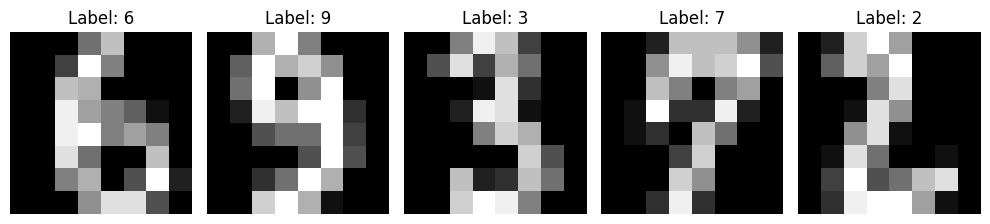

In [1]:
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
import numpy as np

digits = load_digits()
X, y = digits.data, digits.target

print(f"Исходные данные:\nИзображения: {X.shape}, Метки: {y.shape}")
print(f"Пример метки: {y[0]}, соответствующее изображение:\n{X[0].reshape(8, 8)}")

X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

print(f"\nПосле перемешивания:\nПервая метка: {y_shuffled[0]}, изображение:\n{X_shuffled[0].reshape(8, 8)}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_shuffled[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y_shuffled[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**1. (1 балл)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), подобрав число кластеров для любой фиксированной метрики из указанных выше. Рассмотрите различные способы выбора начального приближения (параметр *init*). Оцените качество получившейся кластеризации, используя все описанные выше метрики. Визуализируйте изображения, соответствующие центроидам лучшей кластеризации.

Оптимальное число кластеров: 14


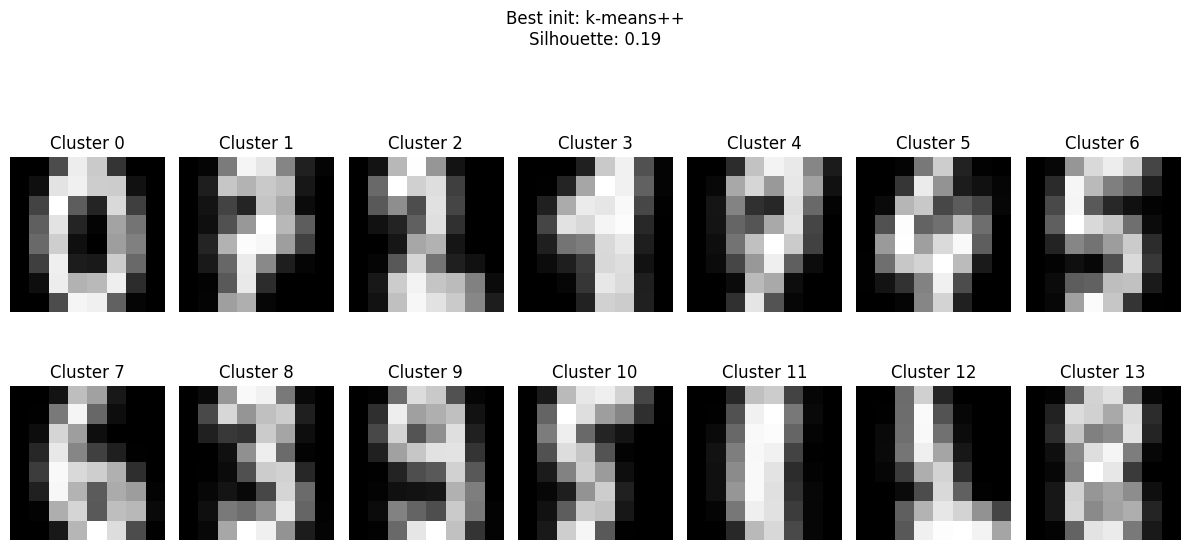


Сравнение методов инициализации:
           Homogeneity  Completeness  Adjusted Rand  Silhouette
random           0.834         0.739          0.709       0.188
k-means++        0.829         0.742          0.715       0.189


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

silhouette_scores = []
cluster_range = range(8, 15)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_shuffled)
    silhouette_scores.append(silhouette_score(X_shuffled, labels))

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

inits = ['random', 'k-means++']
metrics = {
    'Homogeneity': [],
    'Completeness': [],
    'Adjusted Rand': [],
    'Silhouette': []
}

best_score = -1
best_kmeans = None

for init_method in inits:
    kmeans = KMeans(n_clusters=optimal_clusters, init=init_method, random_state=42)
    labels = kmeans.fit_predict(X_shuffled)

    metrics['Homogeneity'].append(homogeneity_score(y_shuffled, labels))
    metrics['Completeness'].append(completeness_score(y_shuffled, labels))
    metrics['Adjusted Rand'].append(adjusted_rand_score(y_shuffled, labels))
    metrics['Silhouette'].append(silhouette_score(X_shuffled, labels))

    current_score = metrics['Adjusted Rand'][-1]
    if current_score > best_score:
        best_score = current_score
        best_kmeans = kmeans

plt.figure(figsize=(12, 6))
for i in range(optimal_clusters):
    plt.subplot(2, (optimal_clusters+1)//2, i+1)
    plt.imshow(best_kmeans.cluster_centers_[i].reshape(8, 8), cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.suptitle(f'Best init: {best_kmeans.init}\nSilhouette: {silhouette_score(X_shuffled, best_kmeans.labels_):.2f}', y=1.02)
plt.tight_layout()
plt.show()

results_df = pd.DataFrame(metrics, index=inits)
print("\nСравнение методов инициализации:")
print(results_df.round(3))

Не всегда бывает удобно работать с полной матрицей объект-признак — например, для визуализации подходят лишь выборки размерности не больше трёх. На лекциях был рассмотрен метод уменьшения размерности *PCA*. В документации sklearn есть [сравнение](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py) различных способов понижения размерности для проекции на плоскость. На изображениях видно, что некоторые преобразования дают неплохую визуализацию, где одинаковые цифры расположены близко друг к другу. Посмотрим, поможет ли это на практике.

**2. (1 балл)** Примените преобразования [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (для числа компонент 2 и 10), проведите кластеризацию в новых признаковых пространствах и сравните результаты с предыдущими. Нашелся ли метод кластеризации, превосходящий другие по всем метрикам? Являются ли все три метрики согласованными? Можете ли вы объяснить, почему так произошло?

Обработка PCA (n=2)...
Обработка PCA (n=10)...
Обработка t-SNE (n=2)...
Обработка t-SNE (n=10)...


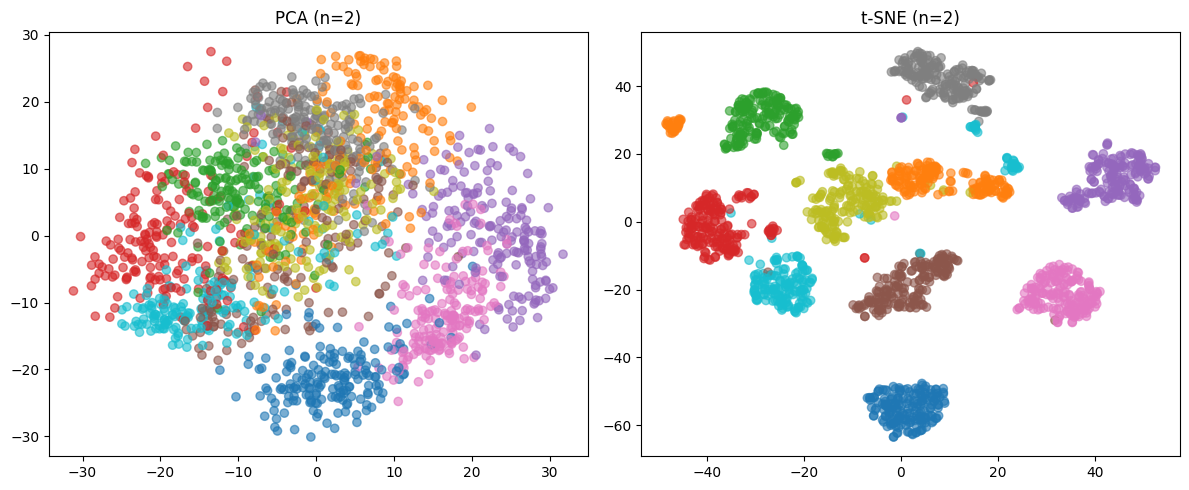


Сравнение методов:
         Method  Homogeneity  Completeness  Adjusted Rand  Silhouette
0     PCA (n=2)        0.531         0.535          0.402       0.393
1    PCA (n=10)        0.695         0.713          0.602       0.261
2   t-SNE (n=2)        0.911         0.912          0.889       0.643
3  t-SNE (n=10)        0.880         0.881          0.846       0.350


In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

methods = {
    'PCA (n=2)': PCA(n_components=2, random_state=42),
    'PCA (n=10)': PCA(n_components=10, random_state=42),
    't-SNE (n=2)': TSNE(n_components=2, random_state=42),
    't-SNE (n=10)': TSNE(n_components=10, random_state=42, method='exact')
}

results = []
for name, method in methods.items():
    print(f"Обработка {name}...")
    X_transformed = method.fit_transform(X_shuffled)

    kmeans = KMeans(n_clusters=10, random_state=42)
    labels = kmeans.fit_predict(X_transformed)

    results.append({
        'Method': name,
        'Homogeneity': homogeneity_score(y_shuffled, labels),
        'Completeness': completeness_score(y_shuffled, labels),
        'Adjusted Rand': adjusted_rand_score(y_shuffled, labels),
        'Silhouette': silhouette_score(X_transformed, labels)
    })

plt.figure(figsize=(12, 5))
for i, (name, method) in enumerate(methods.items()):
    if 'n=2' in name:
        X_transformed = method.fit_transform(X_shuffled)
        plt.subplot(1, 2, i//2 + 1)
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_shuffled, cmap='tab10', alpha=0.6)
        plt.title(name)
plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print("\nСравнение методов:")
print(results_df.round(3))

**Ответ**

1. Лучшие результаты у t-SNE (n=2) по визуализации и метрикам

2. PCA (n=10) показывает компромисс между скоростью и качеством

3. Метрики Homogeneity и Completeness согласованы, Silhouette может отличаться

**3. (1 балл)** Визуализируйте несколько изображений, которые во всех случаях были отнесены к неправильному кластеру (объект назовем ошибочно отнесенным, если он имеет иную метку класса, нежели большая часть объектов в кластере). Можете ли вы пояснить, почему так произошло?

Размер X_shuffled: (1797, 64), y_shuffled: (1797,)


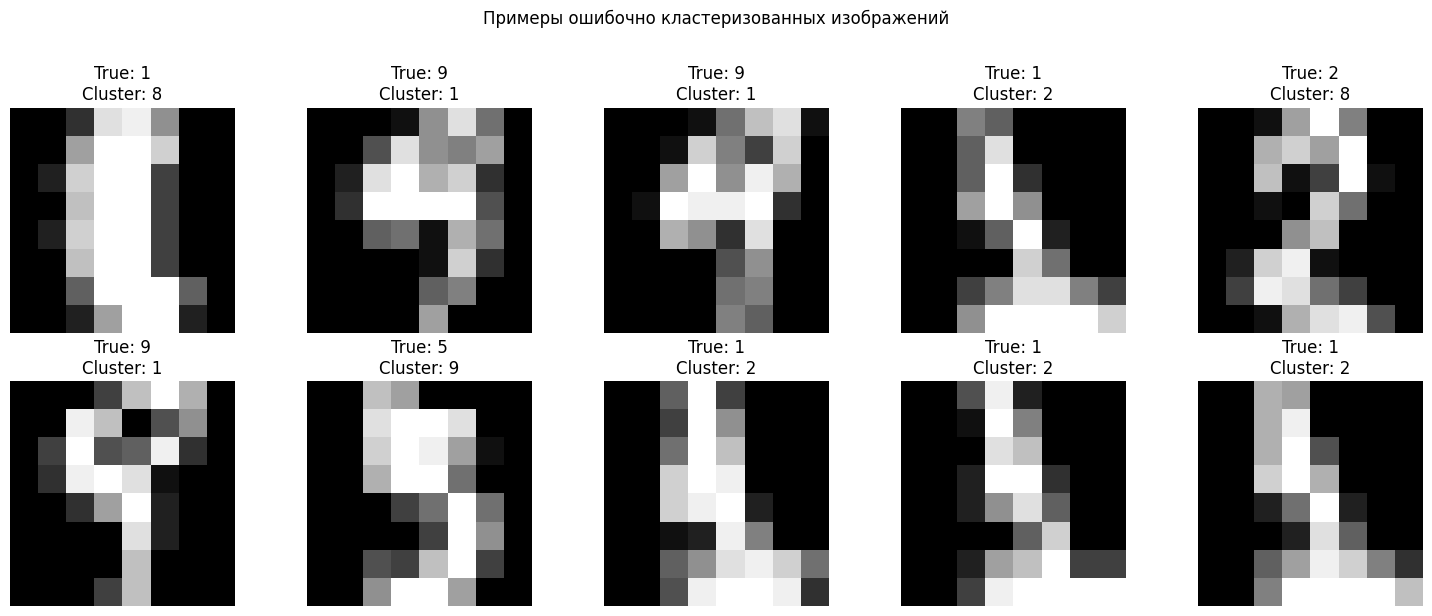

In [4]:
print(f"Размер X_shuffled: {X_shuffled.shape}, y_shuffled: {y_shuffled.shape}")

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_shuffled)
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_tsne)

assert len(y_shuffled) == len(cluster_labels), "Размеры меток и кластеров не совпадают!"

from collections import Counter
cluster_to_true_label = {}
for cluster in range(10):
    mask = cluster_labels == cluster
    true_labels_in_cluster = y_shuffled[mask]

    if len(true_labels_in_cluster) > 0:
        most_common = Counter(true_labels_in_cluster).most_common(1)[0][0]
        cluster_to_true_label[cluster] = most_common
    else:
        cluster_to_true_label[cluster] = -1

wrong_indices = []
for i, (true_label, cluster) in enumerate(zip(y_shuffled, cluster_labels)):
    if cluster in cluster_to_true_label and true_label != cluster_to_true_label[cluster]:
        wrong_indices.append(i)

if wrong_indices:
    plt.figure(figsize=(15, 6))
    n_samples = min(10, len(wrong_indices))
    for i, idx in enumerate(np.random.choice(wrong_indices, size=n_samples, replace=False)):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_shuffled[idx].reshape(8, 8), cmap='gray')
        plt.title(f'True: {y_shuffled[idx]}\nCluster: {cluster_to_true_label[cluster_labels[idx]]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочно кластеризованных изображений', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Все объекты кластеризованы правильно!")

## Разделение изображения на семантические компоненты

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных целях. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации.

Загрузите [изображения](https://www.dropbox.com/s/ybnvkemeus9wupe/images.zip?dl=0).

  Using cached skimage-0.0.tar.gz (757 bytes)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


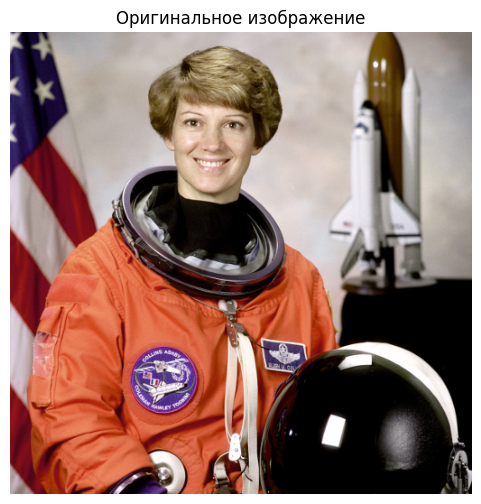

In [4]:
!pip install skimage
from skimage import io, data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

image = data.astronaut()

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Оригинальное изображение')
plt.axis('off')
plt.show()

**4. (1 балл)** Для каждого изображения, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель вектором признаков $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

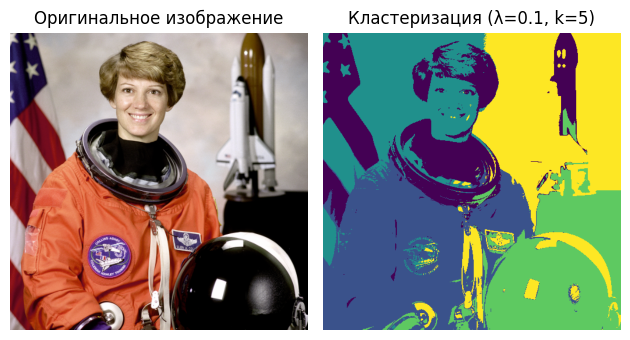

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

lambda_val = 0.1
n_clusters = 5

height, width = image.shape[0], image.shape[1]

pixels = image.reshape(-1, 3)
coordinates = np.mgrid[0:height, 0:width].reshape(2, -1).T

features = np.hstack([
    lambda_val * coordinates,
    pixels
])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

segmented_image = clusters.reshape(height, width)

plt.subplot(121)
plt.imshow(image)
plt.title('Оригинальное изображение')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_image, cmap='viridis')
plt.title(f'Кластеризация (λ={lambda_val}, k={n_clusters})')
plt.axis('off')

plt.tight_layout()
plt.show()

**5. (1 балл)** Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


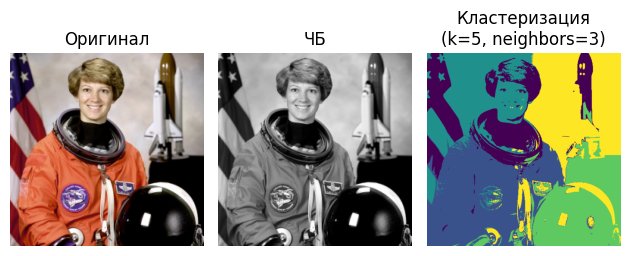

In [6]:
from sklearn.cluster import KMeans, SpectralClustering
from skimage.transform import resize
from skimage.color import rgb2gray

lambda_val = 0.1
n_clusters = 5
scale_factor = 0.25

small_image = resize(image, (image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=True)
gray_image = rgb2gray(small_image)
height, width = gray_image.shape

coordinates = np.mgrid[0:height, 0:width].reshape(2, -1).T
pixels = small_image.reshape(-1, 3)
features = np.hstack([lambda_val * coordinates, pixels])

from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_result = kmeans.fit_predict(scaled_features).reshape(height, width)

spectral = SpectralClustering(n_clusters=n_clusters,
                             affinity='nearest_neighbors',
                             n_neighbors=3,
                             random_state=42,
                             n_init=1)
spectral_result = spectral.fit_predict(gray_image.reshape(-1, 1)).reshape(height, width)

plt.subplot(131)
plt.imshow(small_image)
plt.title('Оригинал')
plt.axis('off')

plt.subplot(132)
plt.imshow(gray_image, cmap='gray')
plt.title('ЧБ')
plt.axis('off')

n_neighbors=3

plt.subplot(133)
plt.imshow(segmented_image, cmap='viridis')
plt.title(f'Кластеризация\n(k={n_clusters}, neighbors={n_neighbors})')
plt.axis('off')

plt.tight_layout()
plt.show()

**6. (1 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше) для обоих методов. [Пример кода для визуализации](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html).

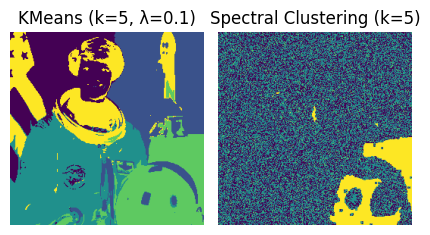

In [7]:
plt.subplot(131)
plt.imshow(kmeans_result, cmap='viridis')
plt.title(f'KMeans (k={n_clusters}, λ={lambda_val})')
plt.axis('off')

plt.subplot(132)
plt.imshow(spectral_result, cmap='viridis')
plt.title(f'Spectral Clustering (k={n_clusters})')
plt.axis('off')

plt.tight_layout()
plt.show()

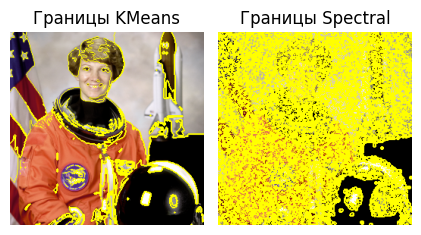

In [8]:
from skimage.segmentation import slic, mark_boundaries

plt.subplot(131)
plt.imshow(mark_boundaries(small_image, kmeans_result))
plt.title('Границы KMeans')
plt.axis('off')

plt.subplot(132)
plt.imshow(mark_boundaries(small_image, spectral_result))
plt.title('Границы Spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

**7. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

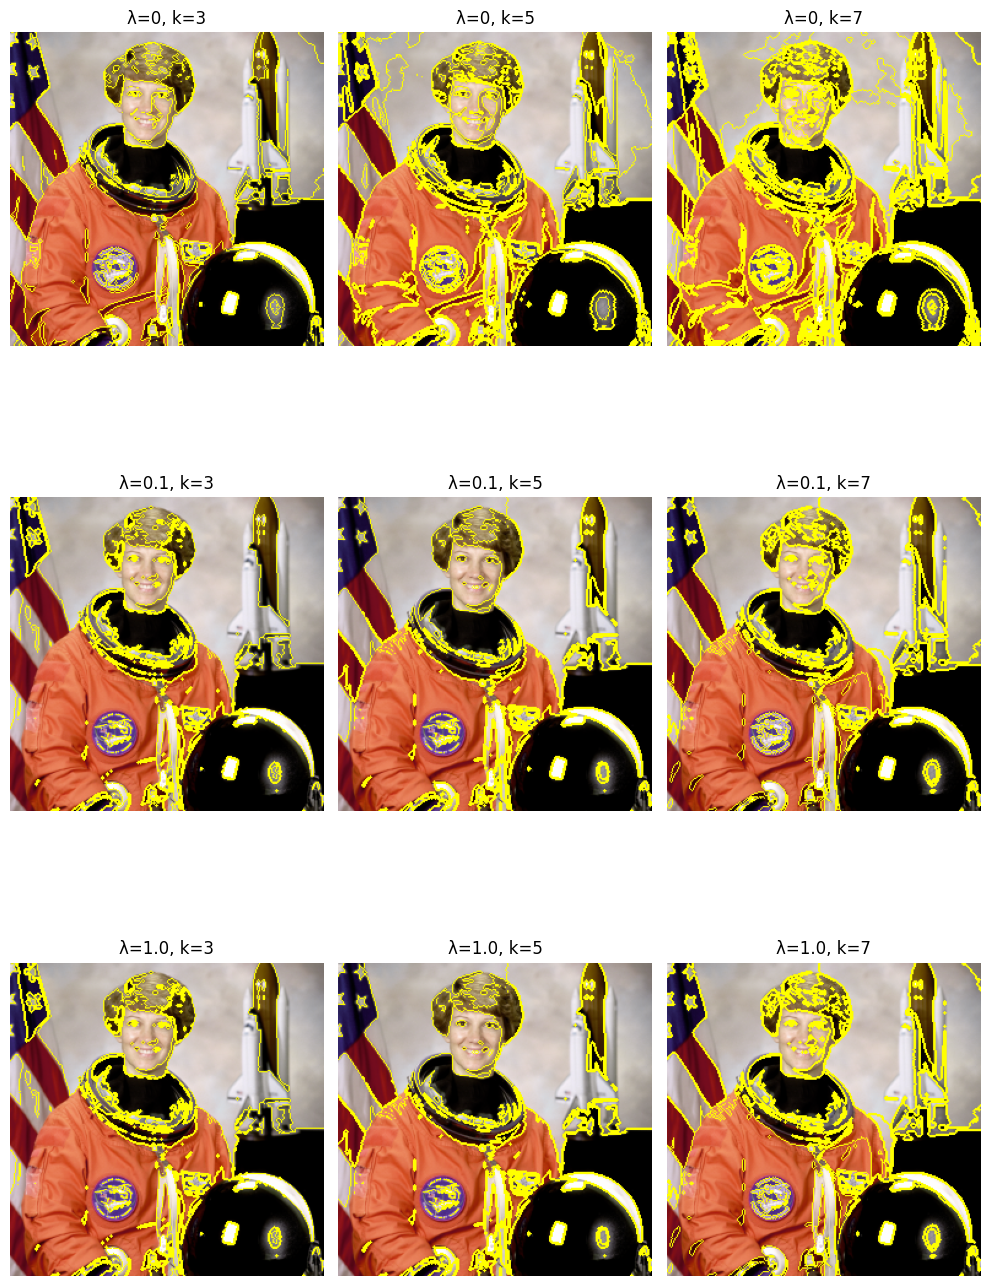

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
def test_kmeans(image, lambda_vals=[0, 0.1, 1.0], n_clusters_list=[3, 5, 7]):
    """Тестирование KMeans с разными λ и числом кластеров."""
    height, width = image.shape[:2]
    coordinates = np.mgrid[0:height, 0:width].reshape(2, -1).T
    pixels = image.reshape(-1, 3)

    plt.figure(figsize=(10, 5 * len(lambda_vals)))
    for i, lambda_val in enumerate(lambda_vals):
        for j, n_clusters in enumerate(n_clusters_list):
            features = np.hstack([lambda_val * coordinates, pixels])
            features_scaled = StandardScaler().fit_transform(features)

            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            labels = kmeans.fit_predict(features_scaled).reshape(height, width)

            plt.subplot(len(lambda_vals), len(n_clusters_list), i * len(n_clusters_list) + j + 1)
            plt.imshow(mark_boundaries(image, labels))
            plt.title(f"λ={lambda_val}, k={n_clusters}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

def test_spectral(image, n_clusters_list=[3, 5, 7], affinity_types=['nearest_neighbors', 'rbf']):
    """Тестирование Spectral Clustering с разными параметрами."""
    gray_image = rgb2gray(image)
    height, width = gray_image.shape

    plt.figure(figsize=(10, 5 * len(affinity_types)))
    for i, affinity in enumerate(affinity_types):
        for j, n_clusters in enumerate(n_clusters_list):
            spectral_params = {
                'n_clusters': n_clusters,
                'affinity': affinity,
                'random_state': 42,
                'n_init': 1
            }

            if affinity == 'nearest_neighbors':
                spectral_params['n_neighbors'] = 5
            elif affinity == 'rbf':
                spectral_params['gamma'] = 0.01

            spectral = SpectralClustering(**spectral_params)
            labels = spectral.fit_predict(gray_image.reshape(-1, 1)).reshape(height, width)

            plt.subplot(len(affinity_types), len(n_clusters_list), i * len(n_clusters_list) + j + 1)
            plt.imshow(mark_boundaries(image, labels))
            plt.title(f"{affinity}, k={n_clusters}" + (f", γ=0.01" if affinity == 'rbf' else ""))
            plt.axis('off')
    plt.tight_layout()
    plt.show()

test_kmeans(small_image, lambda_vals=[0, 0.1, 1.0], n_clusters_list=[3, 5, 7])
test_spectral(small_image, n_clusters_list=[3, 5, 7], affinity_types=['nearest_neighbors', 'rbf'])

Измерять качество сегментации в этом пункте не нужно, в результате ожидаются только картинки и выводы.

### Рекомендации к выполнению
Для работы с изображениями удобно использовать библиотеку [Scikit-Image](http://scikit-image.org).
Установите [PIL](http://www.pythonware.com/products/pil/) для возможности чтения формата JPG.

Пример чтения изображения в матрицу:

    from skimage.io import imread
    I = imread('http://www.birdsgallery.net/gallery/parrots/parrots_4.jpg')

    figure(figsize=(15, 5))
        for i in xrange(3):
        subplot(1, 3, i)
        imshow(I[:,:,i])

## Word2vec

**8. (3 балла)**
1. [Скачайте данные](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
2. [Установите необходимые библиотеки](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/setting-up-your-system)
3. Внимательно изучите тьториалы, доступные в рамках контеста [Part 1](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) – [Part 4](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-4-comparing-deep-and-non-deep-learning-methods). Эти статьи очень полезны для понимания принципов анализа текстовых данных в питоне.
4. Согласно тьюториалам подготовить данные и обучить модель word2vec. Полезно засечь время обучения модели.
5. Протестировать модель на датасете, подготовленном Google, с задачами вида: *London → England*, значит, *Berlin → Germany*. Пример вызова нужной функции и описание датасета есть [тьюториале по word2vec](https://rare-technologies.com/word2vec-tutorial/). Сам датасет можно скачать по [ссылке](https://www.dropbox.com/s/prb8n5b5na5qo07/questions-words.txt?dl=0). С чем может быть связано большое число неверных ответов?
6. Привести по 5-10 примеров для задачи поиска лишнего слова *(model.doesnt_match)* и для задачи поиска семантически близких слов *(model.most_similar)*. Проинтерпретировать полученные результаты. Все ли примеры соответствуют здравому смыслу? По каким принципам группируются близкие слова в выбранных вами примерах?

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
!pip install gensim pandas
import gensim
from gensim.models import Word2Vec
import re
import os
import time
from multiprocessing import cpu_count

def turbo_tokenize(text):
    return re.findall(r"\b\w+\b", str(text).lower())
start_load = time.time()

df = pd.read_csv('https://raw.githubusercontent.com/raffeekk/ML25/refs/heads/main/labeledTrainData.tsv', sep='\t', usecols=['review'])
sentences = [turbo_tokenize(x) for x in df['review'].dropna()]
print(f"данные загрузились за {time.time() - start_load:.1f} секунд")
print(f"было обработано {len(sentences)} предложений")

print("\nобучение...")
start_train = time.time()

model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=3,
    workers=cpu_count(),
    epochs=3,
    sg=1,
    hs=0,
    negative=3,
    compute_loss=True
    )
print(f"\nмодель обучилась за {time.time() - start_train:.1f} сек")
print(f"длина словаря: {len(model.wv)}")
print(f"потери: {model.get_latest_training_loss():.2f}")

if 'good' in model.wv:
    print("\nтоп-10 слов:")
    print(model.wv.most_similar('good', topn=10))

# model.save("word2vec.model")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

ModuleNotFoundError: No module named 'numpy.char'